In [2]:
import pandas as pd

In [2]:
pd.read_csv('DAUPSA.csv')

,DATE,DAUPSA
0,2005-12-01,348.3
1,2006-01-01,374.5
2,2006-02-01,366.4
3,2006-03-01,377.7
4,2006-04-01,381.7
...,...,...
209,2023-05-01,145.8
210,2023-06-01,143.6
211,2023-07-01,148.9
212,2023-08-01,160.1


In [3]:
data = pd.read_csv('internet.csv')

In [4]:
data

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,0,Afghanistan,AFG,1980,0.000000,0.000000,0,0.000000
1,1,Afghanistan,AFG,1981,0.000000,0.000000,0,0.000000
2,2,Afghanistan,AFG,1982,0.000000,0.000000,0,0.000000
3,3,Afghanistan,AFG,1983,0.000000,0.000000,0,0.000000
4,4,Afghanistan,AFG,1984,0.000000,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...
8862,8862,Zimbabwe,ZWE,2016,91.793457,23.119989,3341464,1.217633
8863,8863,Zimbabwe,ZWE,2017,98.985077,24.400000,3599269,1.315694
8864,8864,Zimbabwe,ZWE,2018,89.404869,25.000000,3763048,1.406322
8865,8865,Zimbabwe,ZWE,2019,90.102287,25.100000,3854006,1.395818


In [5]:
shipping_data = pd.read_csv('./MTC_14112023083612860.csv')

In [7]:
shipping_data.keys()

Index(['IMP', 'Importer country', 'EXP', 'Exporter country', 'TOG',
       'Type of goods', 'TOB', 'Transport mode', 'MEAS',
       'Transport cost measures', 'COMH0', 'Commodity', 'TIME', 'Year',
       'Value', 'Flag Codes', 'Flags'],
      dtype='object')

In [19]:
# shipping_data groupby type of goods, then avg value per year
df_to_concat = []
for year in shipping_data['Year'].unique():
    print(year)
    temp = shipping_data[shipping_data['Year']==year].groupby('Type of goods')['Value'].mean()
    # make new column for each type of goods, and then only have 1 row per year
    temp = pd.DataFrame(temp).transpose()
    temp['Year'] = year
    df_to_concat.append(temp)

df_to_concat = pd.concat(df_to_concat)
df_to_concat



2003
2004
2005
2006
2007


Type of goods,Agriculture,Crude oil,Manufacturing,Raw material,Year
Value,358017.872689,6.192798e+06,600656.816709,1.648353e+06,2003
Value,489171.743880,8.489879e+06,732511.932368,2.764069e+06,2004
Value,478518.777460,8.615462e+06,836632.479537,2.900726e+06,2005
Value,497100.183413,8.456477e+06,818680.226592,3.362295e+06,2006
Value,679089.783873,8.487710e+06,950411.328844,5.780287e+06,2007


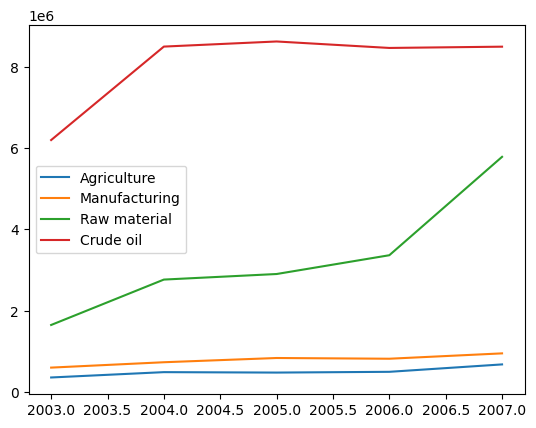

In [20]:
# plot the data
import matplotlib.pyplot as plt

for type_of_goods in shipping_data['Type of goods'].unique():
    plt.plot(df_to_concat['Year'], df_to_concat[type_of_goods], label=type_of_goods)

plt.legend()
plt.show()


In [33]:
cases = pd.read_csv('cases.csv')
cases

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,2020-01-01,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,2020-01-02,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,2020-01-03,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
3,2020-01-04,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
4,2020-01-05,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12525820,2022-09-09,ZW,11.0,0.0,NaN,NaN,256870.0,5596.0,NaN,NaN
12525821,2022-09-10,ZW,18.0,0.0,NaN,NaN,256888.0,5596.0,NaN,NaN
12525822,2022-09-11,ZW,0.0,0.0,NaN,NaN,256888.0,5596.0,NaN,NaN
12525823,2022-09-12,ZW,51.0,0.0,NaN,NaN,256939.0,5596.0,NaN,NaN


In [34]:
# take 1 date from each month
cases['date'] = pd.to_datetime(cases['date'])

cases['month'] = cases['date'].dt.strftime('%Y %b')

# only keep 1 row per month




KeyError: Index(['Month and Year'], dtype='object')

In [35]:
cases = cases.drop_duplicates(subset='month')


In [37]:
cases[['month', 'cumulative_confirmed']].dropna().reset_index(drop=True).to_csv('cases_clean.csv', index=False)